In [2]:
import numpy as np
import sympy as sp

from matplotlib import pyplot as plt

In [3]:
h, k, a, b = sp.symbols('h k a b')
f1_h = sp.Pow(h, 2)
cos_hk = sp.cos(h * k)
sin_hk = sp.sin(h * k)

In [9]:
a_s = [(1/sp.pi) * sp.integrate(f1_h * cos_hk.replace(k, v), (h, -sp.pi, sp.pi)) for v in range(16)]
b_s = [(1/sp.pi) * sp.integrate(f1_h * sin_hk.replace(k, 1), (h, -sp.pi, sp.pi)) for v in range(16)]
print(a_s)
print(b_s)

[2*pi**2/3, -4, 1, -4/9, 1/4, -4/25, 1/9, -4/49, 1/16, -4/81, 1/25, -4/121, 1/36, -4/169, 1/49, -4/225]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
X = sp.Matrix([[0, 1], [1, 0]])
Z = sp.Matrix([[1, 0], [0, -1]])
P0 = sp.Matrix([[1, 0], [0, 0]])
Zero = sp.Matrix([[1], [0]])

In [12]:
z_evol = sp.exp(-1 * sp.I * h * k / 2 * Z)
z_evol

Matrix([
[exp(-I*h*k/2),            0],
[            0, exp(I*h*k/2)]])

In [13]:
exp_evol = z_evol * X * z_evol.conjugate()
res = sp.simplify(exp_evol + exp_evol.conjugate())
w_kha = sp.exp(-1 * sp.I * a /2 * res)
w_kha

Matrix([
[ exp(I*a*cos(h*k/2 + conjugate(h)*conjugate(k)/2))/2 + exp(-I*a*cos(h*k/2 + conjugate(h)*conjugate(k)/2))/2, -exp(I*a*cos(h*k/2 + conjugate(h)*conjugate(k)/2))/2 + exp(-I*a*cos(h*k/2 + conjugate(h)*conjugate(k)/2))/2],
[-exp(I*a*cos(h*k/2 + conjugate(h)*conjugate(k)/2))/2 + exp(-I*a*cos(h*k/2 + conjugate(h)*conjugate(k)/2))/2,  exp(I*a*cos(h*k/2 + conjugate(h)*conjugate(k)/2))/2 + exp(-I*a*cos(h*k/2 + conjugate(h)*conjugate(k)/2))/2]])

In [16]:
uf1_ax = sp.exp(-1 * sp.I * a * X) * w_kha.evalf(subs={k: 1, a: a_s[1]}) * w_kha.evalf(subs={k: 2, a: a_s[2]})
uf1_x = sp.simplify(uf1_ax.replace(a, a_s[0]))
uf1_x


Matrix([
[     0.5*(exp(2*I*(cos(h + conjugate(h)) + 2*pi**2/3)) + exp(8*I*cos(h/2 + conjugate(h)/2)))*exp(-I*(4*cos(h/2 + conjugate(h)/2) + cos(h + conjugate(h)) + 2*pi**2/3)), (-0.5*exp(2*I*(cos(h + conjugate(h)) + 2*pi**2/3)) + 0.5*exp(8*I*cos(h/2 + conjugate(h)/2)))*exp(-I*(4*cos(h/2 + conjugate(h)/2) + cos(h + conjugate(h)) + 2*pi**2/3))],
[(-0.5*exp(2*I*(cos(h + conjugate(h)) + 2*pi**2/3)) + 0.5*exp(8*I*cos(h/2 + conjugate(h)/2)))*exp(-I*(4*cos(h/2 + conjugate(h)/2) + cos(h + conjugate(h)) + 2*pi**2/3)),      0.5*(exp(2*I*(cos(h + conjugate(h)) + 2*pi**2/3)) + exp(8*I*cos(h/2 + conjugate(h)/2)))*exp(-I*(4*cos(h/2 + conjugate(h)/2) + cos(h + conjugate(h)) + 2*pi**2/3))]])

In [18]:
res = []
interval = np.linspace(-np.pi, np.pi, 500)
for i in interval:
    res.append(np.array(uf1_x.evalf(subs={h: i}) * Zero, dtype=np.complex128))

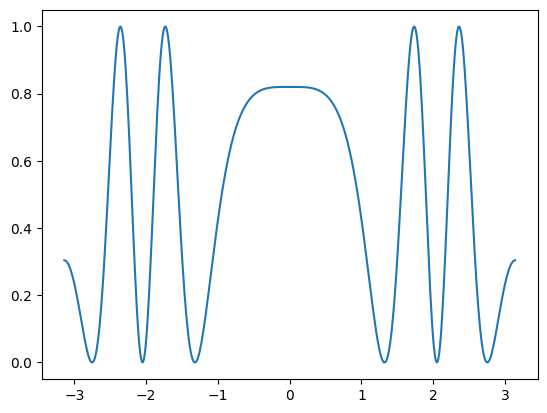

In [19]:
p0_expval = [(s.conj().T @ np.array(P0, dtype=np.float64) @ s)[0][0].real for s in res]
plt.plot(interval, p0_expval)